In [1]:
import sys

sys.path.append('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from datetime import timedelta

from fmpy import simulate_fmu

from devs_fmu.bouncing_ball import BouncingBall
from devs_fmu.simulator import simulator

from config import OPENMODELICA_FMUS_PATH

In [3]:
fmu_path = OPENMODELICA_FMUS_PATH / 'BouncingBall.fmu'

In [4]:
def simulate_fmpy():    
    result = simulate_fmu(
        filename=fmu_path,
        stop_time=3,
        fmi_type='CoSimulation'
    )
    
    return result

def plot_simulate_fmpy(result):
    time_list = []
    height_list = []
    velocity_list = []
    for row in result:
        time_list.append(row[0])
        height_list.append(row[1])
        velocity_list.append(row[2])

    plt.plot(time_list, height_list)
    plt.show()

    plt.plot(time_list, velocity_list)
    plt.show()

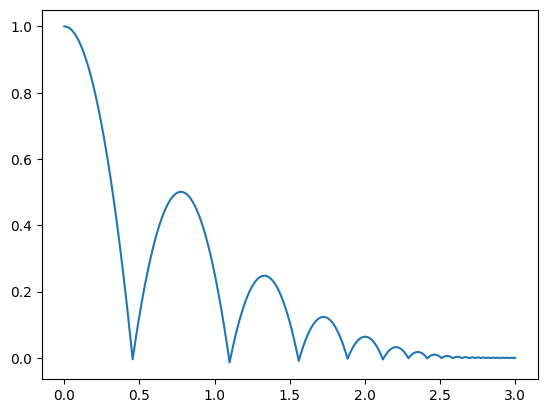

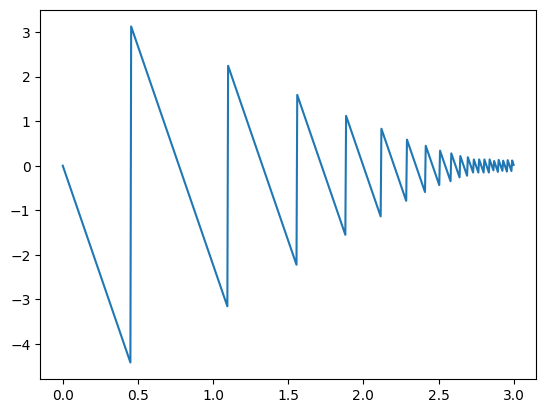

In [5]:
plot_simulate_fmpy(simulate_fmpy())

In [20]:
def simulate_devs(step_size):
    simulator.reset()
    m = BouncingBall(fmu_path)
    
    time_list = np.arange(0, 3, step_size)
    height_list = []
    velocity_list = []
    
    for time in time_list:
        height_list.append(m.get_height())
        velocity_list.append(m.get_velocity())
        simulator.advance(timedelta(seconds=step_size))
    
    return time_list, height_list, velocity_list

def plot_simulate_devs(time_list, height_list, velocity_list):
    plt.plot(time_list, height_list)
    plt.show()

    plt.plot(time_list, velocity_list)
    plt.show()

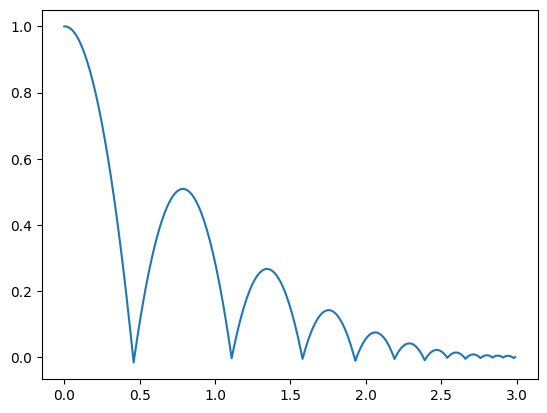

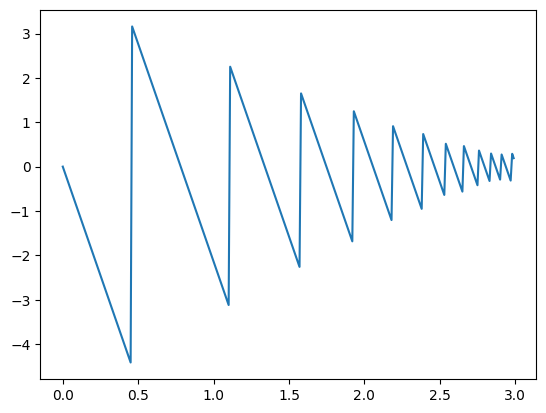

In [21]:
plot_simulate_devs(*simulate_devs(step_size=1e-2))

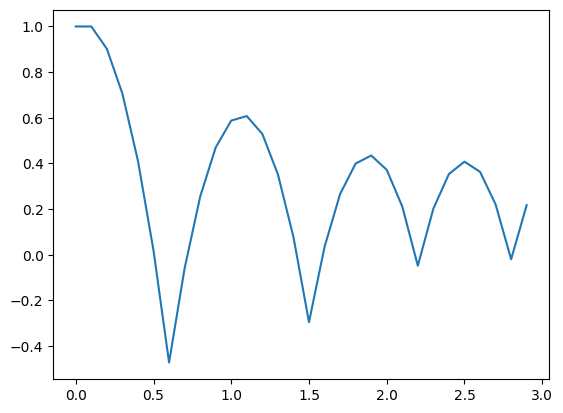

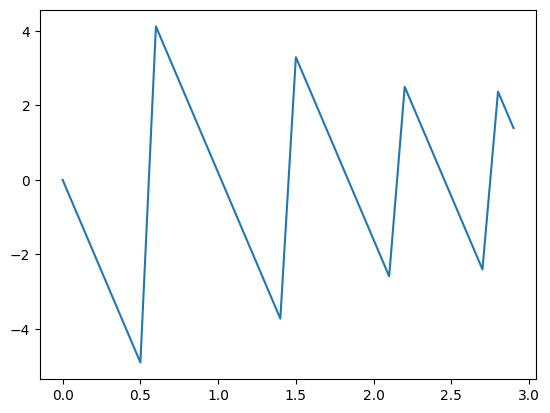

In [26]:
plot_simulate_devs(*simulate_devs(step_size=1e-1))